In [1]:
# import and preprocess data
%matplotlib inline
from pu_preprocessing import *
rcParams['figure.figsize'] = 20, 8

d2014_states
d2015_states

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE,COUNTY,STATE
0,1-Methyl Cyclopropene,2015,41,1,0.0,0.0,Baker County,OR
1,1-Methyl Cyclopropene,2015,41,21,0.0,0.1,Gilliam County,OR
2,1-Methyl Cyclopropene,2015,41,27,0.0,1.7,Hood River County,OR
3,1-Methyl Cyclopropene,2015,41,49,0.0,0.1,Morrow County,OR
4,1-Methyl Cyclopropene,2015,41,55,0.0,0.0,Sherman County,OR
5,1-Methyl Cyclopropene,2015,41,59,0.0,5.7,Umatilla County,OR
6,1-Methyl Cyclopropene,2015,41,61,0.0,0.0,Union County,OR
7,1-Methyl Cyclopropene,2015,41,63,0.0,0.0,Wallowa County,OR
8,1-Methyl Cyclopropene,2015,41,65,0.0,0.1,Wasco County,OR
9,1-Methyl Cyclopropene,2015,53,1,0.0,10.6,Adams County,WA


In [2]:
d2014_mx = d2014_states.as_matrix()
x = d2014_mx[:, 2]   # State_Code
yl = d2014_mx[:, 4]  # LOW_ESTIMATE
yh = d2014_mx[:, 5]  # HIGH_ESTIMATE
yl.min(), yl.max(), yh.min(), yh.max()

(0.0, 5507145.8, 0.0, 5507145.8)

### VISUAL

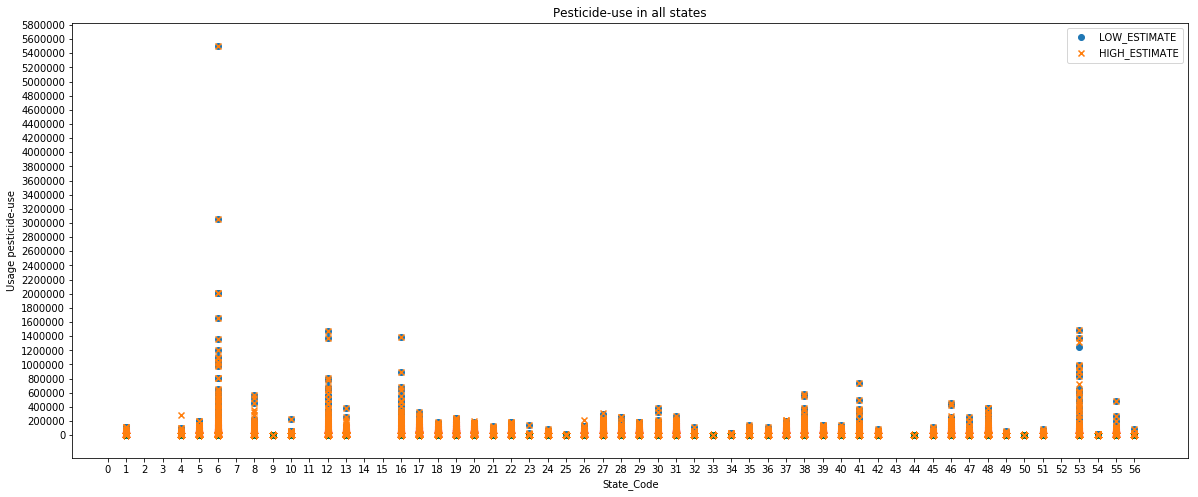

In [3]:
d2014_mx = d2014_states.as_matrix()
x = d2014_mx[:, 2]   # State_Code

yl = d2014_mx[:, 4]  # LOW_ESTIMATE
plt.scatter(x, yl, label="LOW_ESTIMATE")

yh = d2014_mx[:, 5]  # HIGH_ESTIMATE
plt.scatter(x, yh, marker='x', label="HIGH_ESTIMATE")

plt.xticks(range(x.max()+1))
plt.yticks(range(0, 6000000, 200000))
plt.xlabel("State_Code")
plt.ylabel("Usage pesticide-use")
plt.title("Pesticide-use in all states")
plt.legend()

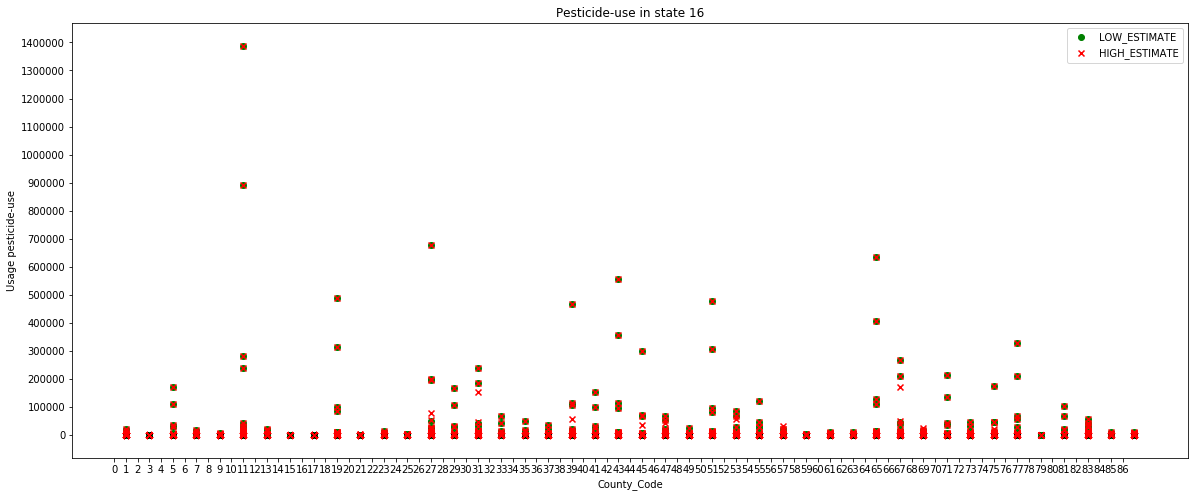

In [4]:
# Visualize the Pesticide-use at the certain state 
state_code = 16
state = d2014_states.loc[d2014_states['STATE_CODE'] == state_code]

county_code = state['COUNTY_CODE'].drop_duplicates()

state_mx = state.as_matrix()
x = state_mx[:, 3]  # County_Code

yl = state_mx[:, 4]  # LOW_ESTIMATE
yh = state_mx[:, 5]  # HIGH_ESTIMATE

plt.scatter(x, yl, label="LOW_ESTIMATE", color='green')
plt.scatter(x, yh, marker='x', label="HIGH_ESTIMATE", color='red')

plt.xticks(range(county_code.max()))
plt.yticks(range(0, 1500000, 100000))

plt.xlabel("County_Code")
plt.ylabel("Usage pesticide-use")
plt.title("Pesticide-use in state %i" %state_code)
plt.legend()


In [5]:
# Frequency pesticide-use of compound at every State
x = d2014_states[['COMPOUND']].groupby(d2014_states['STATE_CODE']).describe()

# slicing columns multi_index
y = x.loc[:, (slice('COMPOUND'), ['top', 'freq'])]
y

COMPOUND     
                        top freq
STATE_CODE                      
1           Trifloxystrobin   67
4             Fenpropathrin   15
5                Fluroxypyr   74
6                Glyphosate   57
8                Glyphosate   63
9                    Captan    8
10                 Atrazine    3
12                    2,4-D   67
13             Nicosulfuron  159
16                     EPTC   44
17               Tefluthrin  102
18               Tefluthrin   92
19               Tefluthrin   99
20               Tefluthrin  105
21             Aminopyralid  120
22                    2,4-D   64
23                   Captan   16
24                Abamectin   23
25                   Captan   14
26               Glyphosate   83
27             Clothianidin   87
28               Bifenthrin   82
29                 Simazine  114
30                 Imazamox   56
31             Chlorpyrifos   93
32             Chlorpyrifos   17
33                   Captan   10
34             Thiamethoxam   20
35                    2,4-D   33
36             Chlorpyrifos   59
37           Thifensulfuron  100
38          Trifloxystrobin   53
39               Tefluthrin   88
40            Propiconazole   77
41               Spinetoram   36
42             Fluxapyroxad   67
44               Endosulfan    5
45             Clothianidin   46
46               Tefluthrin   66
47             Aminopyralid   95
48               Glyphosate  254
49                Malathion   29
50                   Captan   14
51             Aminopyralid   97
53               Spinetoram   39
54                    2,4-D   55
55                    2,4-D   72
56               Cyfluthrin   23

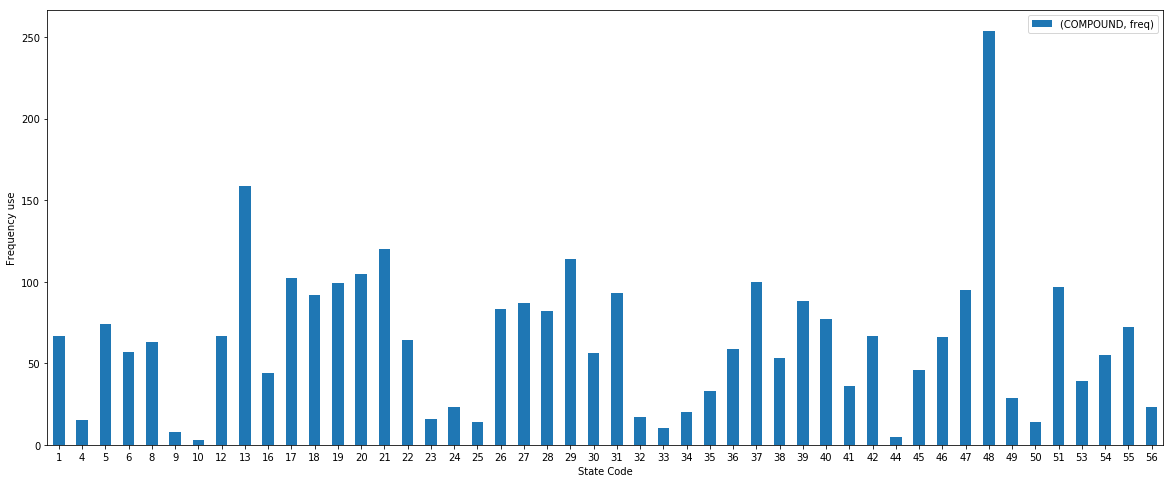

In [19]:
y_freq = x.loc[:, (slice('COMPOUND'), ['freq'])]
y_freq.plot(kind='bar')
plt.xlabel("State Code")
plt.ylabel("Frequency use")
plt.xticks(rotation=0)
plt.legend()

In [7]:
max_year_high_est, max_year_low_est, min_year_high_est, min_year_low_est = get_max_min(d2014_states) 
print("MAX")
print(max_year_high_est)
print(max_year_low_est)
print("\n")
print("MIN")
print(min_year_high_est)
print(min_year_low_est)

MAX
YEAR                2014.0
HIGH_ESTIMATE    5507145.8
dtype: float64
YEAR               2014.0
LOW_ESTIMATE    5507145.8
dtype: float64


MIN
YEAR             2014.0
HIGH_ESTIMATE       0.0
dtype: float64
YEAR            2014.0
LOW_ESTIMATE       0.0
dtype: float64


In [8]:
max_year_high_est, max_year_low_est, min_year_high_est, min_year_low_est = get_max_min(d2015_states) 
print("MAX")
print(max_year_high_est)
print(max_year_low_est)
print("\n")
print("MIN")
print(min_year_high_est)
print(min_year_low_est)

MAX
YEAR                2015.0
HIGH_ESTIMATE    2283969.1
dtype: float64
YEAR               2015.0
LOW_ESTIMATE    2283969.1
dtype: float64


MIN
YEAR             2015.0
HIGH_ESTIMATE       0.0
dtype: float64
YEAR            2015.0
LOW_ESTIMATE       0.0
dtype: float64


Text(0.5,1,'Year 2015')

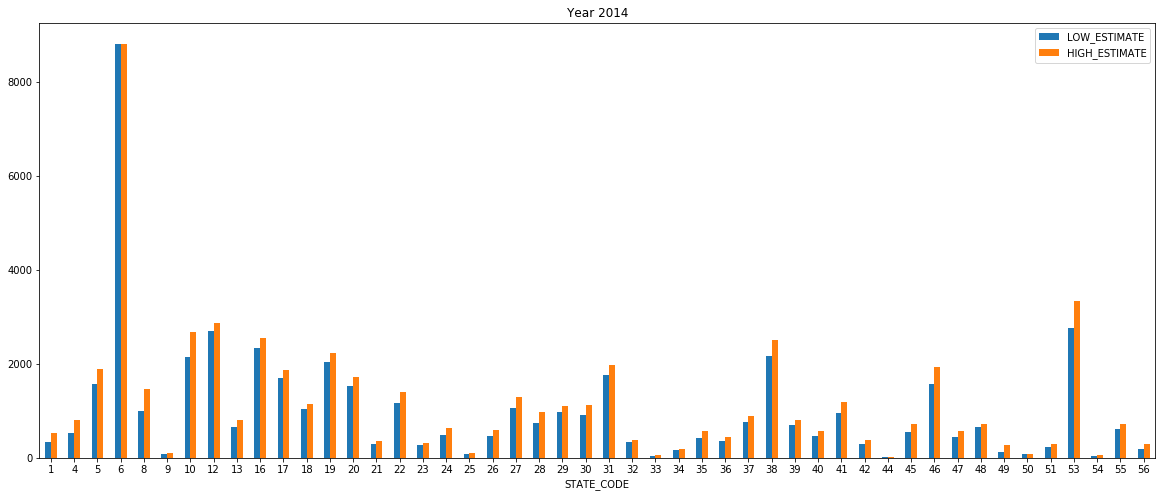

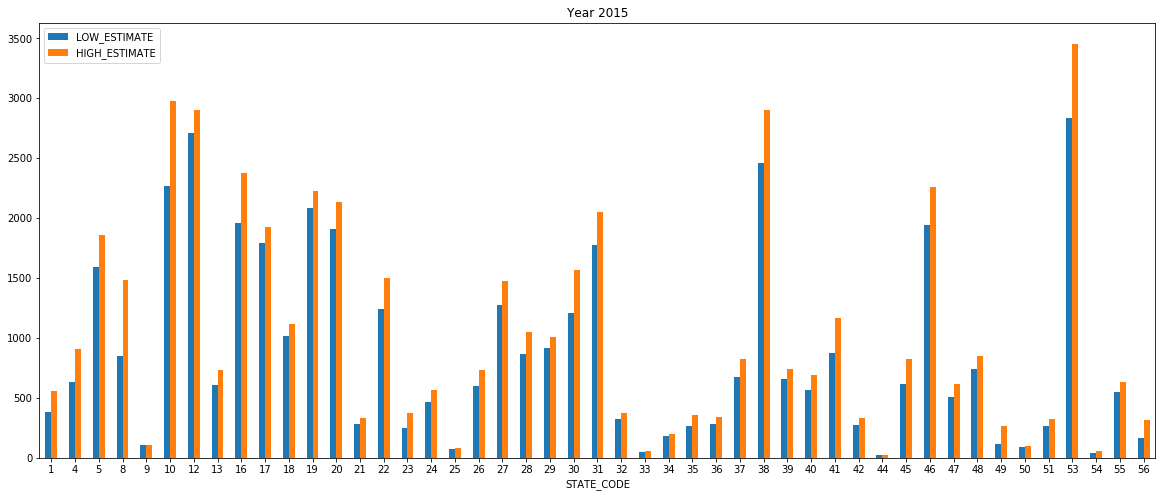

In [18]:
# mean value of pesticide-use of all states 
get_data_state_mean_est(d2014).plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Year 2014")

get_data_state_mean_est(d2015).plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Year 2015")

Source: https://www.kaggle.com/usgs/pesticide-use